In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import torch

In [2]:
def summary_test(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["test_loss"])
    tmp2 = np.array(history[0]["test_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["test_loss"])
        tmp2 += np.array(history[j]["test_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_val(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["val_loss"])
    tmp2 = np.array(history[0]["val_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["val_loss"])
        tmp2 += np.array(history[j]["val_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_train(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["train_loss"])
    tmp2 = np.array(history[0]["train_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["train_loss"])
        tmp2 += np.array(history[j]["train_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

In [3]:
def search_best_lr(path, n_nodes, lr_list):
    
    best_acc = -1
    best_lr = -1
    
    for lr in lr_list:
        _, acc = summary_val(f"{path}/lr_{lr}_beta_0.9", n_nodes)
            
        #print(method, lr, acc[-1])
        if best_acc < acc[-1]:
            best_acc = acc[-1]
            best_lr = lr
    return best_lr

def average_acc(acc_list):
    avg = []
    std = []
    for i in range(len(acc_list[0])):
        avg.append(np.average([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        std.append(np.std([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        
    return avg, std

In [4]:
!ls ../results_final/fashion_mnist_lenet/gossip/node_25/1_local_step/0/alpha_0.1/one_peer_exp/* #lr_0.1_beta_0.9/node0.pk'

../results_final/fashion_mnist_lenet/gossip/node_25/1_local_step/0/alpha_0.1/one_peer_exp/lr_0.001_beta_0.9:
node0.pk   node13.pk  node17.pk  node20.pk  node24.pk  node5.pk  node9.pk
node10.pk  node14.pk  node18.pk  node21.pk  node2.pk   node6.pk
node11.pk  node15.pk  node19.pk  node22.pk  node3.pk   node7.pk
node12.pk  node16.pk  node1.pk	 node23.pk  node4.pk   node8.pk

../results_final/fashion_mnist_lenet/gossip/node_25/1_local_step/0/alpha_0.1/one_peer_exp/lr_0.01_beta_0.9:
node0.pk   node13.pk  node17.pk  node20.pk  node24.pk  node5.pk  node9.pk
node10.pk  node14.pk  node18.pk  node21.pk  node2.pk   node6.pk
node11.pk  node15.pk  node19.pk  node22.pk  node3.pk   node7.pk
node12.pk  node16.pk  node1.pk	 node23.pk  node4.pk   node8.pk

../results_final/fashion_mnist_lenet/gossip/node_25/1_local_step/0/alpha_0.1/one_peer_exp/lr_0.1_beta_0.9:
node0.pk   node13.pk  node17.pk  node20.pk  node24.pk  node5.pk  node9.pk
node10.pk  node14.pk  node18.pk  node21.pk  node2.pk   node6.pk
node11

(0.6, 1.0)

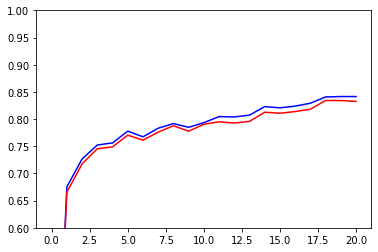

In [5]:
dataset = "fashion_mnist"
model = "lenet"
optimizer = "gossip"

alpha = 0.1
n_nodes = 25
local_step = 1

seed = 0
graph = "one_peer_exp"

lr = 0.1

test_loss, test_acc = summary_test(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
val_loss, val_acc = summary_val(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)

plt.plot(test_acc, color="blue")
plt.plot(val_acc, color="red")
plt.ylim(0.6, 1.0)

exp 0.1 79.85680000000002 0.0
one_peer_exp 0.1 84.14600000000002 0.0
one_peer_adic 0.1 88.86 0.0
two_peer_adic 0.1 89.39320000000001 0.0
four_peer_adic 0.1 89.68399999999998 0.0


(40.0, 95.0)

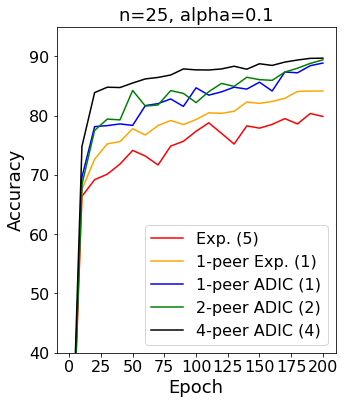

In [10]:
alpha = 0.1
n_nodes = 25
local_step = 1

dataset = "fashion_mnist"
model = "lenet"
optimizer = "gossip"

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["exp", "one_peer_exp", "one_peer_adic", "two_peer_adic", "four_peer_adic"]
labels = ["Exp. (5)", "1-peer Exp. (1)", "1-peer ADIC (1)", "2-peer ADIC (2)", "4-peer ADIC (4)"]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.01, 0.001])
        loss, acc = summary_test(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
plt.ylim(40, 95)

one_peer_adic 0.1 90.0228 0.0
one_peer_exp 0.1 90.13879999999997 0.0
two_peer_adic 0.1 89.99839999999999 0.0


(40.0, 95.0)

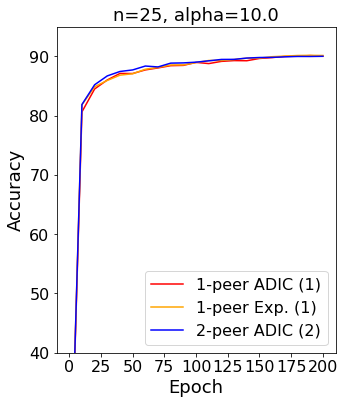

In [13]:
alpha = 10.0
n_nodes = 25
local_step = 1

dataset = "fashion_mnist"
model = "lenet"
optimizer = "gossip"

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["one_peer_adic", "one_peer_exp", "two_peer_adic"]
labels = ["1-peer ADIC (1)", "1-peer Exp. (1)", "2-peer ADIC (2)"]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.01, 0.001])
        loss, acc = summary_test(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
plt.ylim(40, 95)

In [6]:
alpha = 0.1
n_nodes = 25
local_step = 1

dataset = "fashion_mnist"
model = "lenet"
optimizer = "gossip"

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_directed_equidyn", "one_peer_undirected_equidyn", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer D-EquiDyn", "1-peer U-EquiDyn", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
plt.ylim(40, 95)

FileNotFoundError: [Errno 2] No such file or directory: '../results_final/fashion_mnist_lenet/gossip/node_25/1_local_step/0/alpha_0.1/ring/lr_0.1_beta_0.9/node0.pk'

<Figure size 360x432 with 0 Axes>

ring 0.1 73.28386666666667 1.495875799954284
one_peer_directed_equidyn 0.1 88.41906666666667 1.262155799504268
one_peer_undirected_equidyn 0.1 87.91506666666669 1.1395629727614407
one_peer_adic 0.1 89.54719999999999 0.4359038426075108
one_peer_exp 0.1 85.92213333333332 1.2600376855034685


(40.0, 95.0)

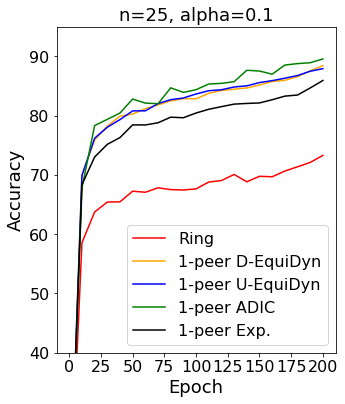

In [5]:
alpha = 0.1
n_nodes = 25
local_step = 1

dataset = "fashion_mnist"
model = "lenet"
optimizer = "gossip"

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_directed_equidyn", "one_peer_undirected_equidyn", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer D-EquiDyn", "1-peer U-EquiDyn", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
plt.ylim(40, 95)

ring 0.1 89.61039999999998 0.0
one_peer_directed_equidyn 0.1 89.784 0.0
one_peer_adic 0.1 89.85880000000002 0.0
one_peer_exp 0.1 89.92679999999999 0.0


(80.0, 95.0)

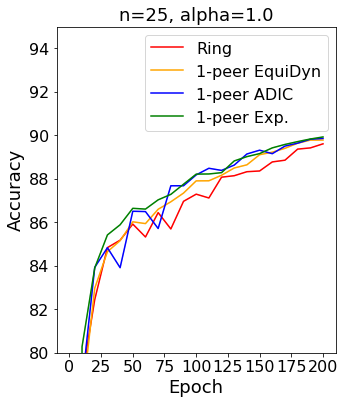

In [6]:
alpha = 1.0
n_nodes = 25
local_step = 1

dataset = "fashion_mnist"
model = "lenet"
optimizer = "gossip"

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_directed_equidyn", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer EquiDyn", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.01, 0.001])
        loss, acc = summary_test(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
plt.ylim(80, 95)

ring 0.1 90.12359999999997 0.0
one_peer_directed_equidyn 0.1 89.98079999999999 0.0
one_peer_adic 0.1 89.94720000000001 0.0
one_peer_exp 0.1 90.03800000000001 0.0


(80.0, 95.0)

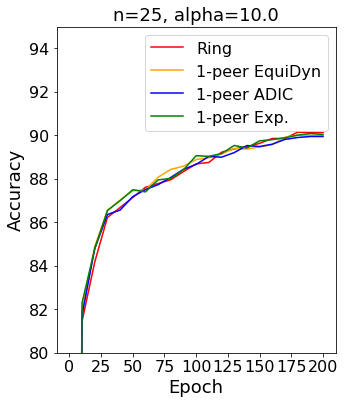

In [11]:
alpha = 10.0
n_nodes = 25
local_step = 1

dataset = "fashion_mnist"
model = "lenet"
optimizer = "gossip"

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_directed_equidyn", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer EquiDyn", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.01, 0.001])
        loss, acc = summary_test(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
plt.ylim(80, 95)